In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from matplotlib.colors import ListedColormap
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler

In [66]:
def generate_datasets(n_samples=500, noise_level=0.5, class_sep = 2.5):
    datasets = {}

    scaler = MinMaxScaler()

    X_3, y_3 = make_classification(n_samples=n_samples, flip_y=noise_level, n_features=3, n_informative=3, n_redundant=0)

    X_3 = scaler.fit_transform(X_3)

    datasets['Three'] = (X_3, y_3)


    X_5, y_5 = make_classification(n_samples=n_samples, flip_y=noise_level, n_features=5, n_informative=5, n_redundant=0)

    X_5 = scaler.fit_transform(X_5)

    datasets['Five'] = (X_5, y_5)

    X_7, y_7 = make_classification(n_samples=n_samples, flip_y=noise_level, n_features=7, n_informative=7, n_redundant=0)

    X_7 = scaler.fit_transform(X_7)

    datasets['Seven'] = (X_7, y_7)

    X_9, y_9 = make_classification(n_samples=n_samples, flip_y=noise_level, n_features=9, n_informative=9, n_redundant=0)

    X_9 = scaler.fit_transform(X_9)

    datasets['Nine'] = (X_9, y_9)

    X_11, y_11 = make_classification(n_samples=n_samples, flip_y=noise_level, n_features=11, n_informative=11, n_redundant=0)

    X_11 = scaler.fit_transform(X_11)

    datasets['Eleven'] = (X_11, y_11)

    X_13, y_13 = make_classification(n_samples=n_samples, flip_y=noise_level, n_features=13, n_informative=13, n_redundant=0)

    X_13 = scaler.fit_transform(X_13)

    datasets['Thirteen'] = (X_13, y_13)

    return datasets


In [67]:
# Generate and plot datasets
datasets = generate_datasets(n_samples=1500, noise_level=0.1)
# plot_datasets(datasets)

In [90]:
def evaluate_model(model, model_name, datasets):
    accuracies = []
    for name, (X, y) in datasets.items():
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        conf_matrix = confusion_matrix(y_test, y_pred)
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title("Confusion Matrix")

        plt.tight_layout()
        plt.show()
        print(f"Classification Report {name}:")

        report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
        accuracies.append(report["accuracy"])

        print(classification_report(y_test, y_pred, zero_division=1))

    labels = ["3", "5", "7", "9", "11", "13"]

    plot_accuracies(accuracies, labels)


In [93]:
def plot_accuracies(accuracies, labels=None, title="Model Accuracies"):
    # if labels is None:
    #     labels = [f"Model {i+1}" for i in range(len(accuracies))]
    plt.figure(figsize=(8, 5))
    # plt.plot(accuracies, color='skyblue')
    plt.plot(labels, accuracies, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
    plt.ylim(0, 1.0)
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    for i, acc in enumerate(accuracies):
        plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center')
    plt.tight_layout()
    plt.show()


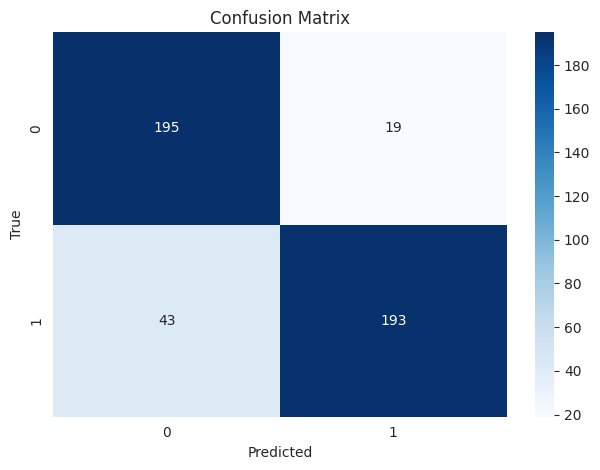

Classification Report Three:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       214
           1       0.91      0.82      0.86       236

    accuracy                           0.86       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.87      0.86      0.86       450



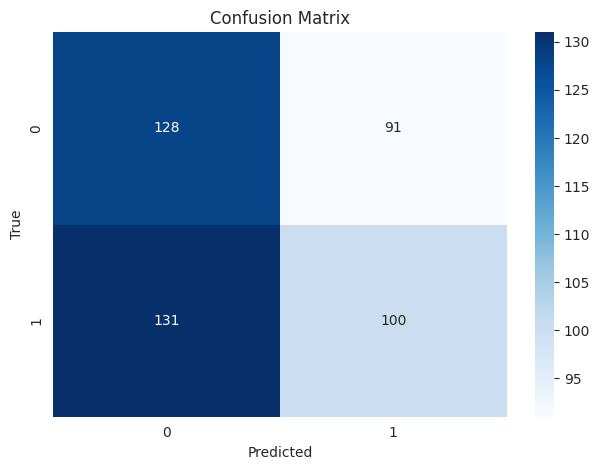

Classification Report Five:
              precision    recall  f1-score   support

           0       0.49      0.58      0.54       219
           1       0.52      0.43      0.47       231

    accuracy                           0.51       450
   macro avg       0.51      0.51      0.50       450
weighted avg       0.51      0.51      0.50       450



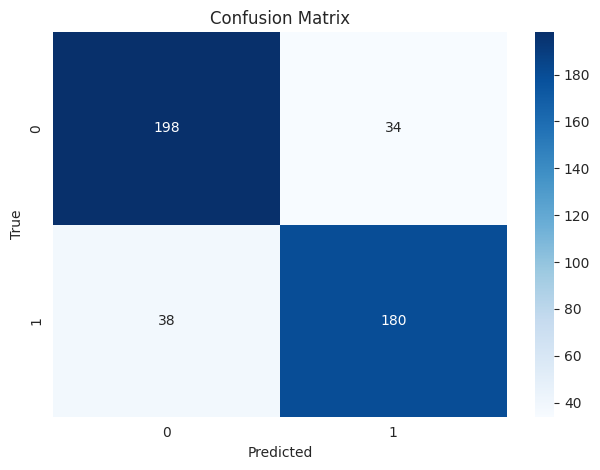

Classification Report Seven:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       232
           1       0.84      0.83      0.83       218

    accuracy                           0.84       450
   macro avg       0.84      0.84      0.84       450
weighted avg       0.84      0.84      0.84       450



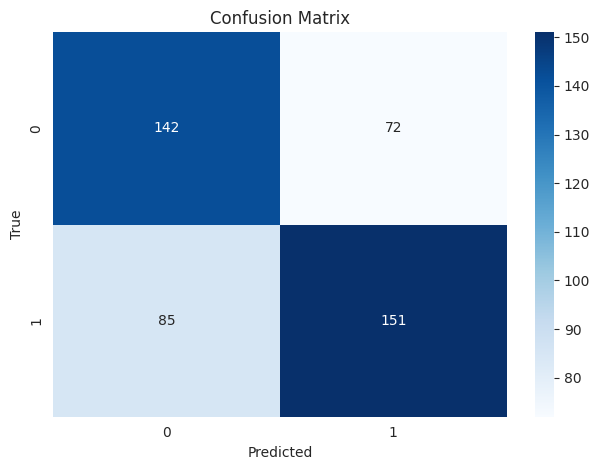

Classification Report Nine:
              precision    recall  f1-score   support

           0       0.63      0.66      0.64       214
           1       0.68      0.64      0.66       236

    accuracy                           0.65       450
   macro avg       0.65      0.65      0.65       450
weighted avg       0.65      0.65      0.65       450



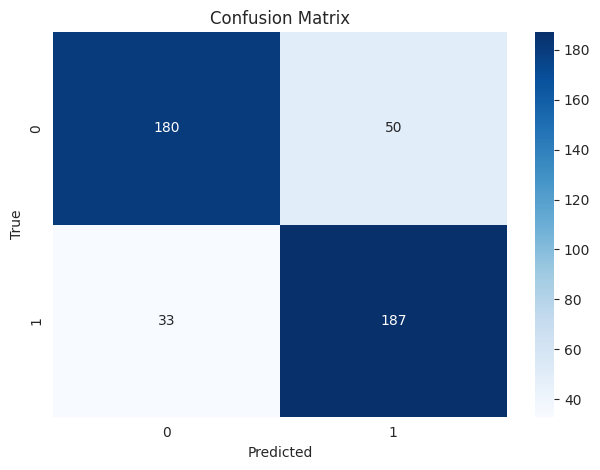

Classification Report Eleven:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       230
           1       0.79      0.85      0.82       220

    accuracy                           0.82       450
   macro avg       0.82      0.82      0.82       450
weighted avg       0.82      0.82      0.82       450



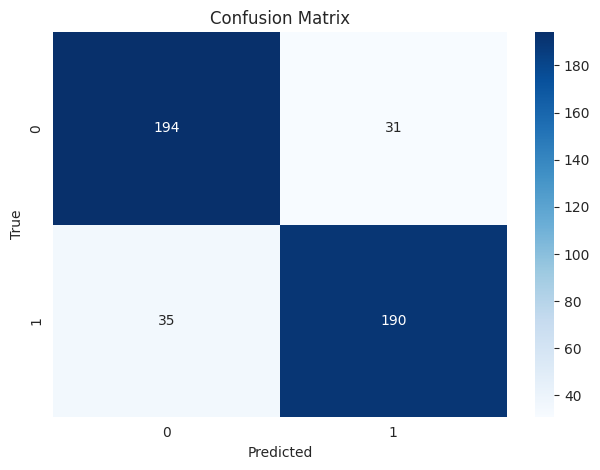

Classification Report Thirteen:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       225
           1       0.86      0.84      0.85       225

    accuracy                           0.85       450
   macro avg       0.85      0.85      0.85       450
weighted avg       0.85      0.85      0.85       450



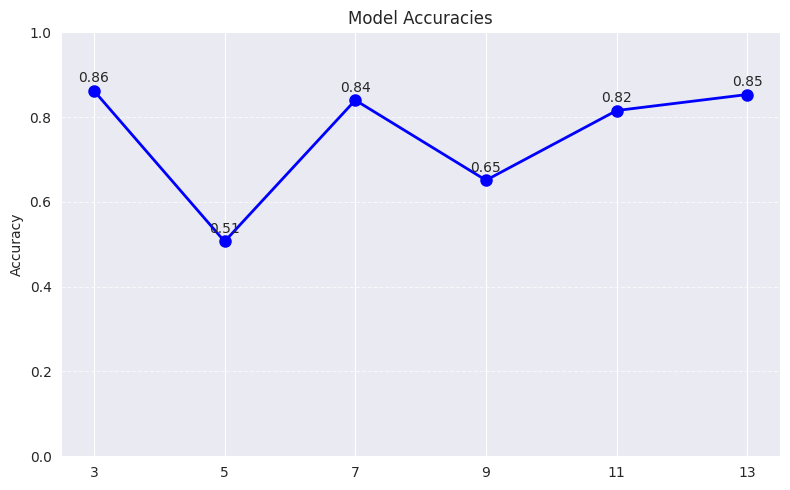

In [94]:
evaluate_model(LogisticRegression(), "Logistic Regression", datasets)

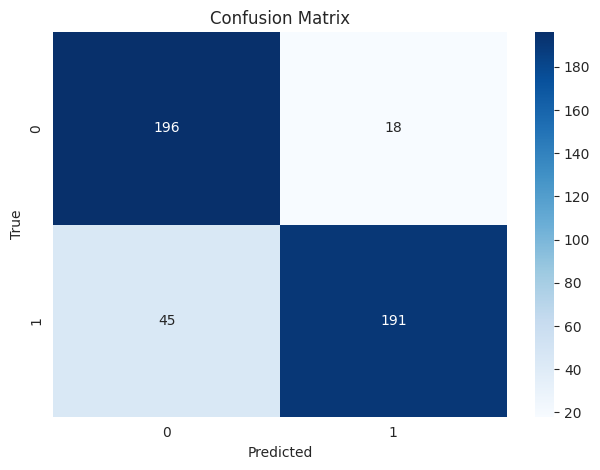

Classification Report Three:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       214
           1       0.91      0.81      0.86       236

    accuracy                           0.86       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.87      0.86      0.86       450



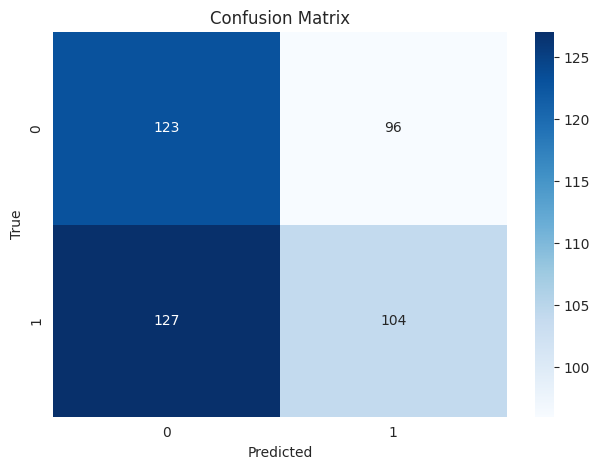

Classification Report Five:
              precision    recall  f1-score   support

           0       0.49      0.56      0.52       219
           1       0.52      0.45      0.48       231

    accuracy                           0.50       450
   macro avg       0.51      0.51      0.50       450
weighted avg       0.51      0.50      0.50       450



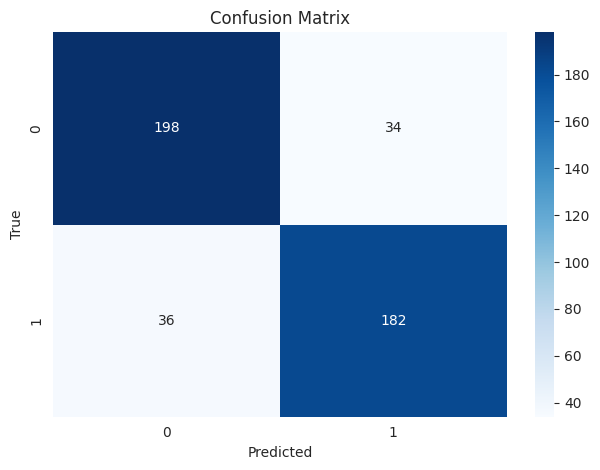

Classification Report Seven:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       232
           1       0.84      0.83      0.84       218

    accuracy                           0.84       450
   macro avg       0.84      0.84      0.84       450
weighted avg       0.84      0.84      0.84       450



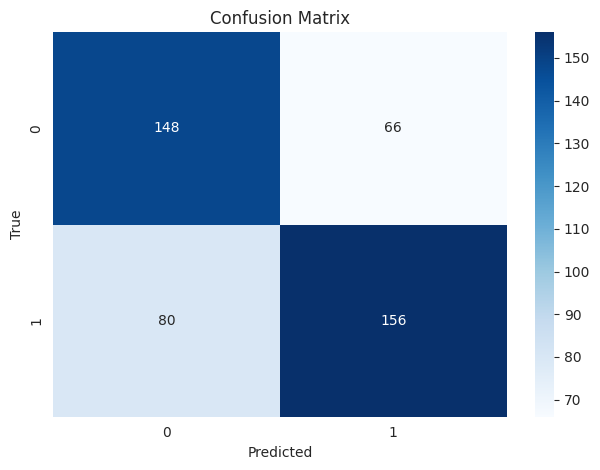

Classification Report Nine:
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       214
           1       0.70      0.66      0.68       236

    accuracy                           0.68       450
   macro avg       0.68      0.68      0.68       450
weighted avg       0.68      0.68      0.68       450



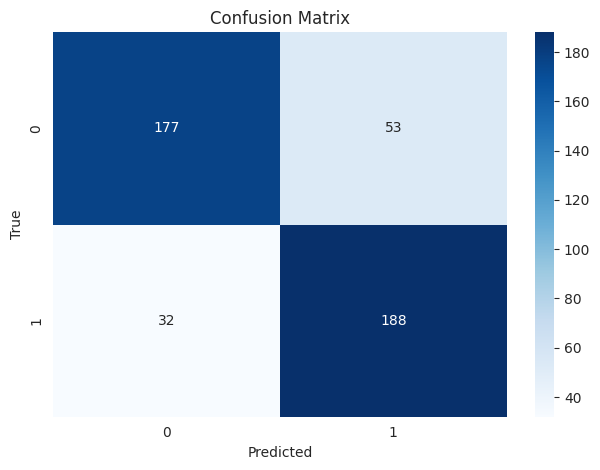

Classification Report Eleven:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       230
           1       0.78      0.85      0.82       220

    accuracy                           0.81       450
   macro avg       0.81      0.81      0.81       450
weighted avg       0.81      0.81      0.81       450



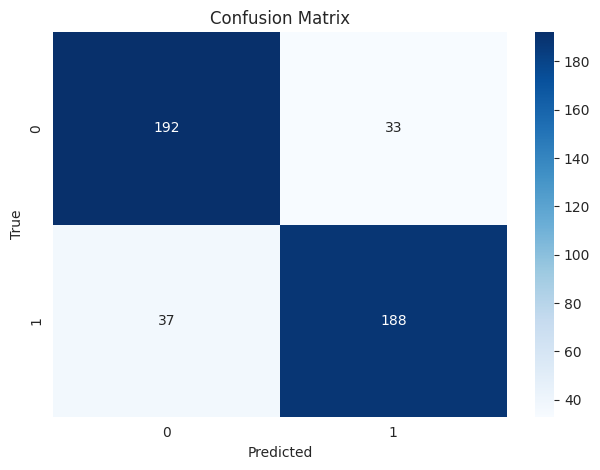

Classification Report Thirteen:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       225
           1       0.85      0.84      0.84       225

    accuracy                           0.84       450
   macro avg       0.84      0.84      0.84       450
weighted avg       0.84      0.84      0.84       450



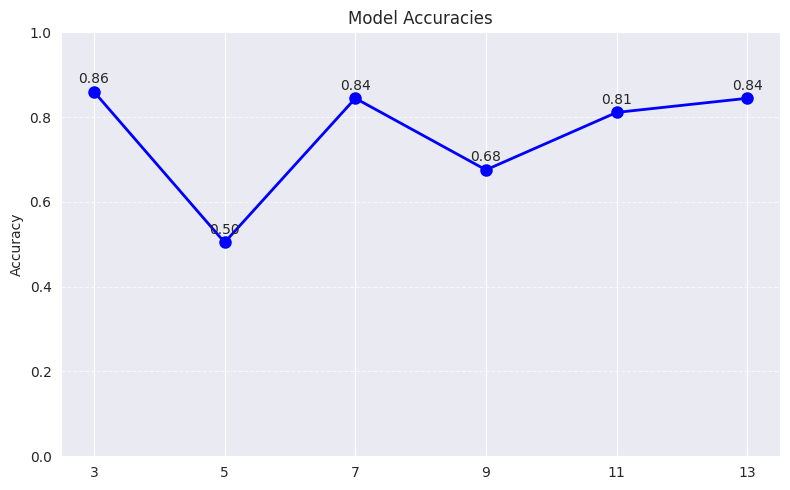

In [95]:
evaluate_model(LinearDiscriminantAnalysis(), "LDA", datasets)

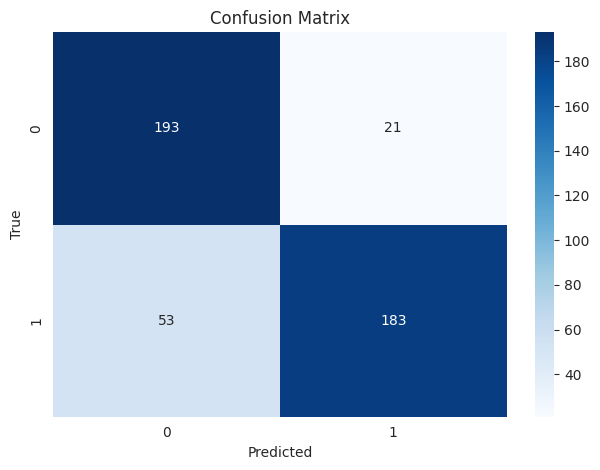

Classification Report Three:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       214
           1       0.90      0.78      0.83       236

    accuracy                           0.84       450
   macro avg       0.84      0.84      0.84       450
weighted avg       0.84      0.84      0.84       450



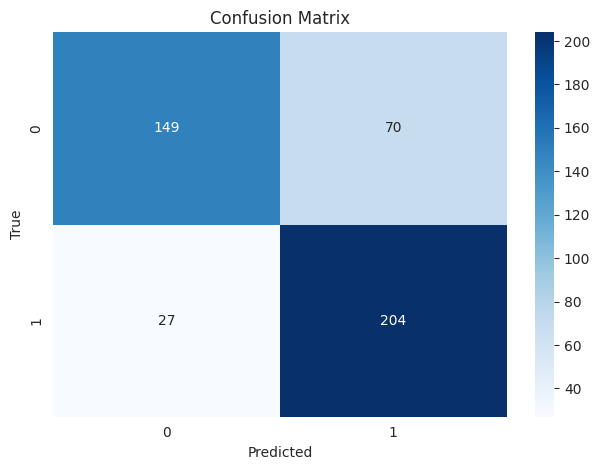

Classification Report Five:
              precision    recall  f1-score   support

           0       0.85      0.68      0.75       219
           1       0.74      0.88      0.81       231

    accuracy                           0.78       450
   macro avg       0.80      0.78      0.78       450
weighted avg       0.79      0.78      0.78       450



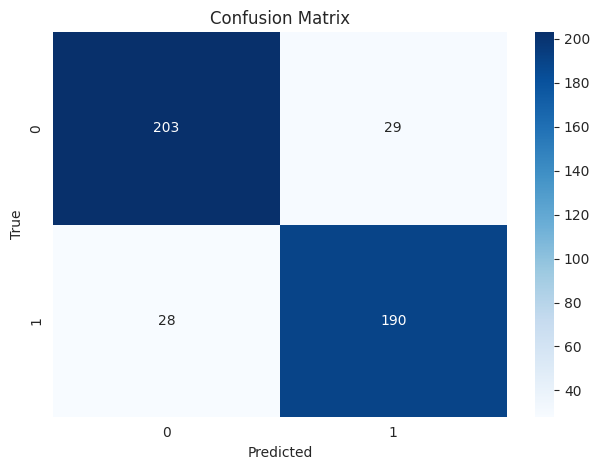

Classification Report Seven:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       232
           1       0.87      0.87      0.87       218

    accuracy                           0.87       450
   macro avg       0.87      0.87      0.87       450
weighted avg       0.87      0.87      0.87       450



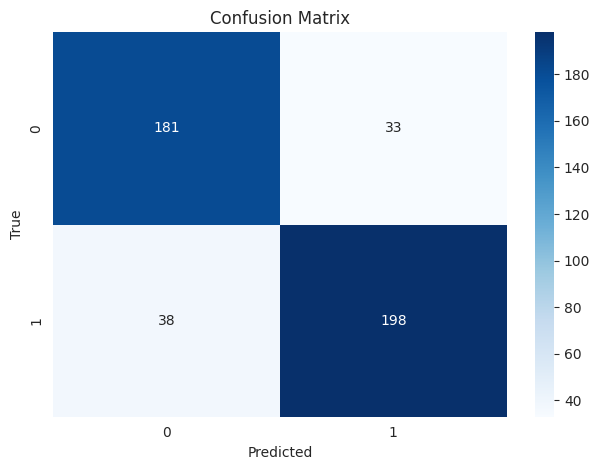

Classification Report Nine:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       214
           1       0.86      0.84      0.85       236

    accuracy                           0.84       450
   macro avg       0.84      0.84      0.84       450
weighted avg       0.84      0.84      0.84       450



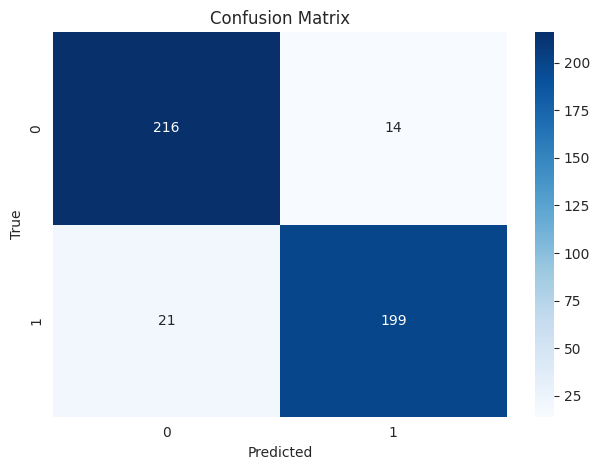

Classification Report Eleven:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       230
           1       0.93      0.90      0.92       220

    accuracy                           0.92       450
   macro avg       0.92      0.92      0.92       450
weighted avg       0.92      0.92      0.92       450



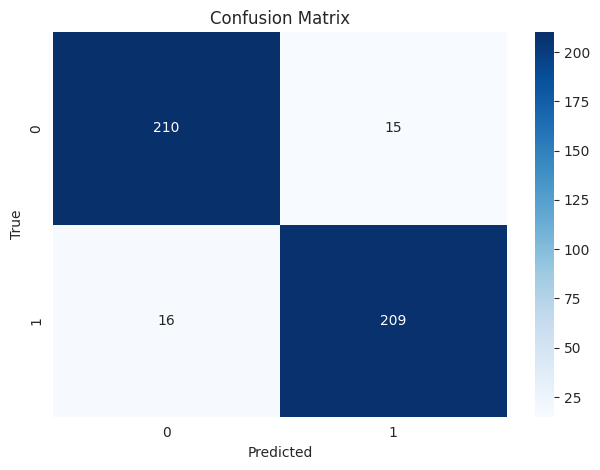

Classification Report Thirteen:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       225
           1       0.93      0.93      0.93       225

    accuracy                           0.93       450
   macro avg       0.93      0.93      0.93       450
weighted avg       0.93      0.93      0.93       450



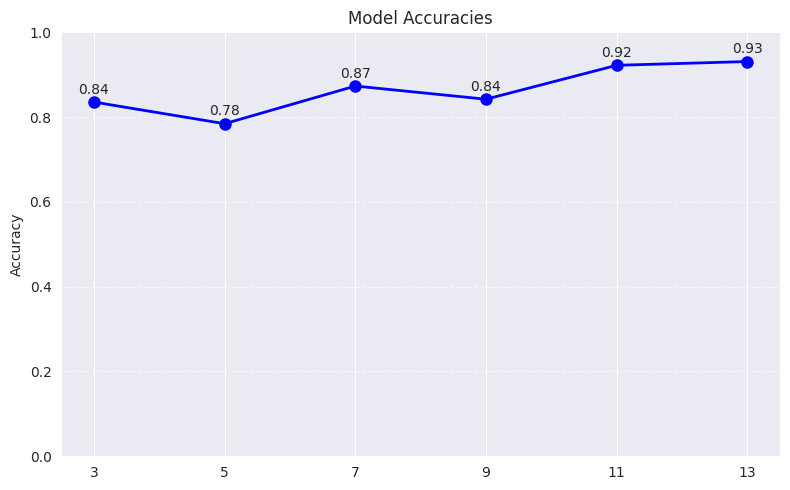

In [96]:
evaluate_model(QuadraticDiscriminantAnalysis(), "QDA", datasets)


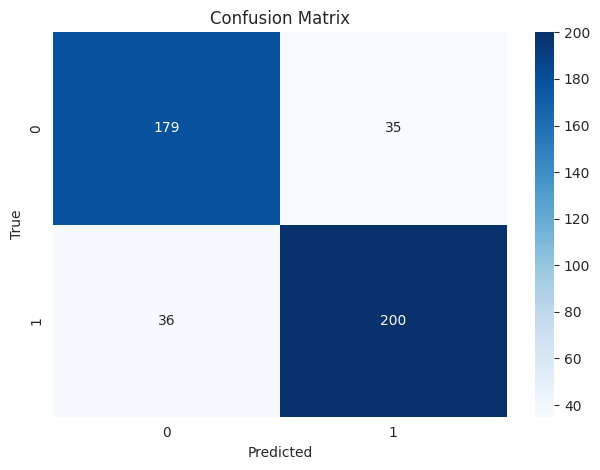

Classification Report Three:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       214
           1       0.85      0.85      0.85       236

    accuracy                           0.84       450
   macro avg       0.84      0.84      0.84       450
weighted avg       0.84      0.84      0.84       450



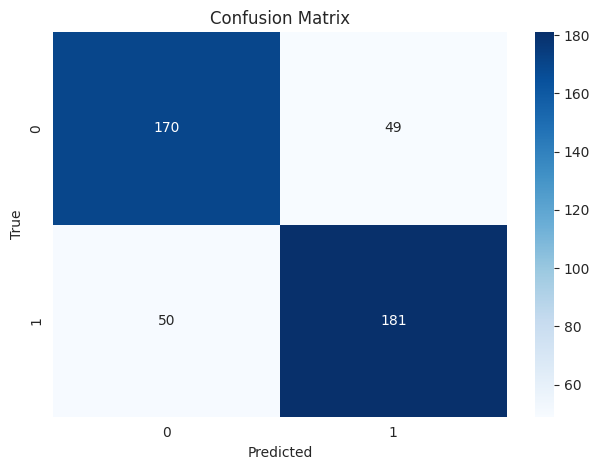

Classification Report Five:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       219
           1       0.79      0.78      0.79       231

    accuracy                           0.78       450
   macro avg       0.78      0.78      0.78       450
weighted avg       0.78      0.78      0.78       450



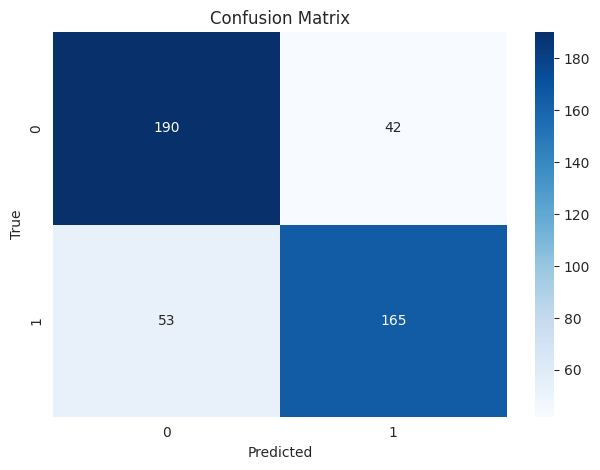

Classification Report Seven:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       232
           1       0.80      0.76      0.78       218

    accuracy                           0.79       450
   macro avg       0.79      0.79      0.79       450
weighted avg       0.79      0.79      0.79       450



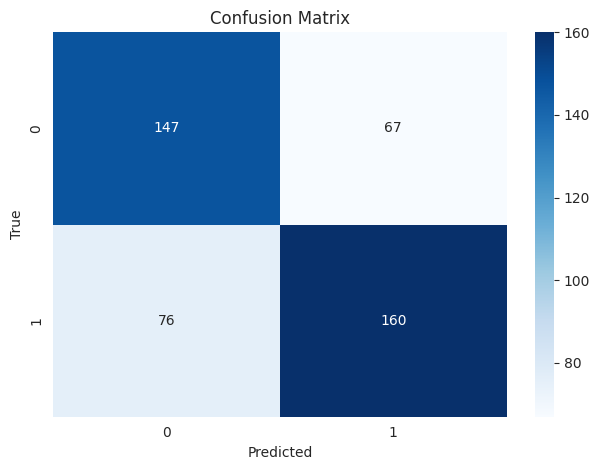

Classification Report Nine:
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       214
           1       0.70      0.68      0.69       236

    accuracy                           0.68       450
   macro avg       0.68      0.68      0.68       450
weighted avg       0.68      0.68      0.68       450



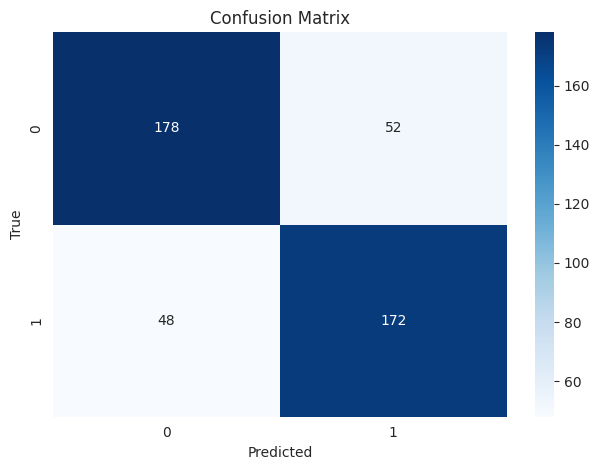

Classification Report Eleven:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       230
           1       0.77      0.78      0.77       220

    accuracy                           0.78       450
   macro avg       0.78      0.78      0.78       450
weighted avg       0.78      0.78      0.78       450



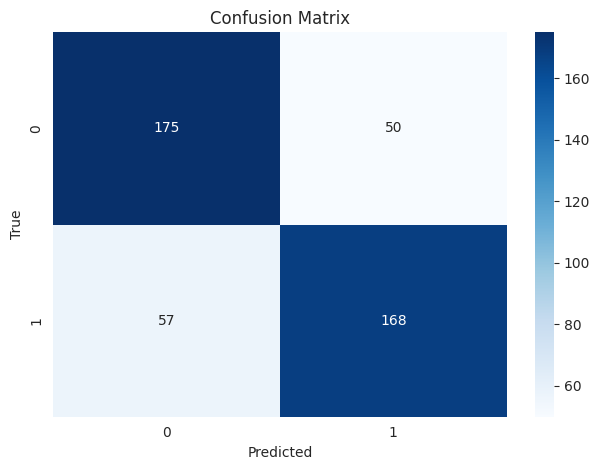

Classification Report Thirteen:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       225
           1       0.77      0.75      0.76       225

    accuracy                           0.76       450
   macro avg       0.76      0.76      0.76       450
weighted avg       0.76      0.76      0.76       450



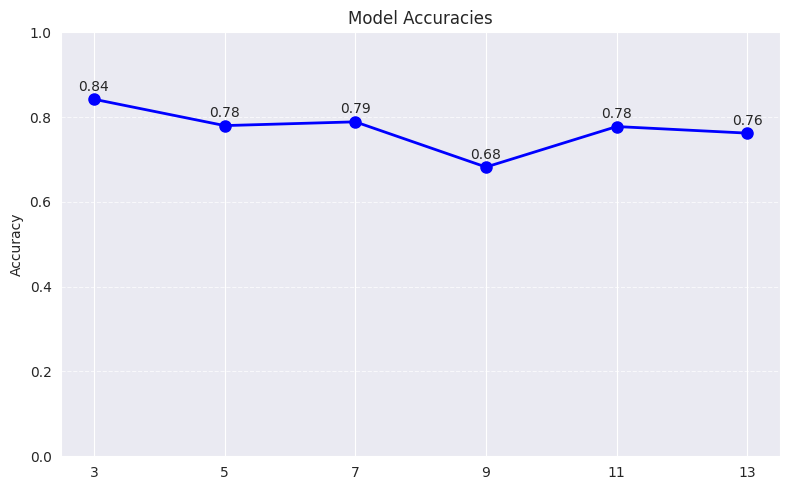

In [97]:
evaluate_model(DecisionTreeClassifier(), "Decision Tree - No Pruning", datasets)

In [98]:
from sklearn.tree import plot_tree

def plot_decision_trees_for_all_datasets(datasets, max_depth=None):
    for name, (X, y) in datasets.items():
        if len(np.unique(y)) > 2:
            continue

        model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
        model.fit(X, y)

        plt.figure(figsize=(12, 6))
        plot_tree(model, filled=True, feature_names=["Feature 1", "Feature 2"], class_names=["Class 0", "Class 1"])
        plt.title(f"Decision Tree - {name} ")
        plt.show()


Decision Trees without pruning:


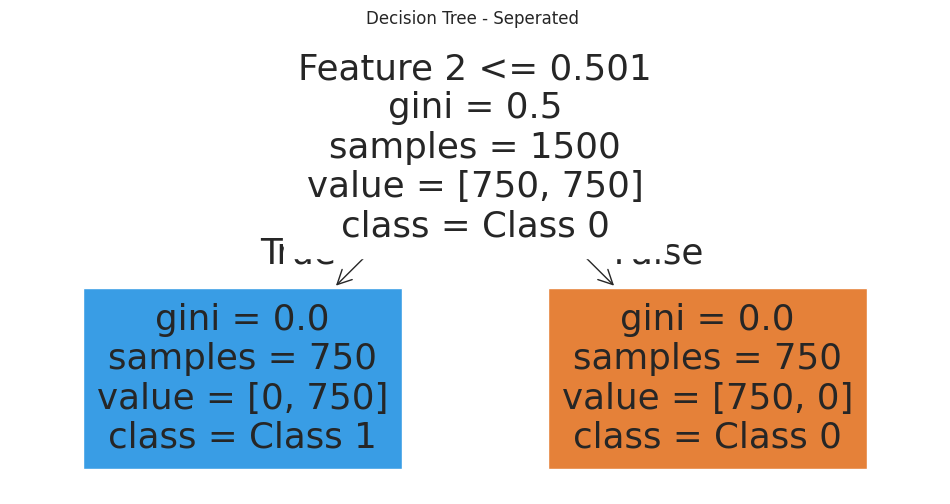

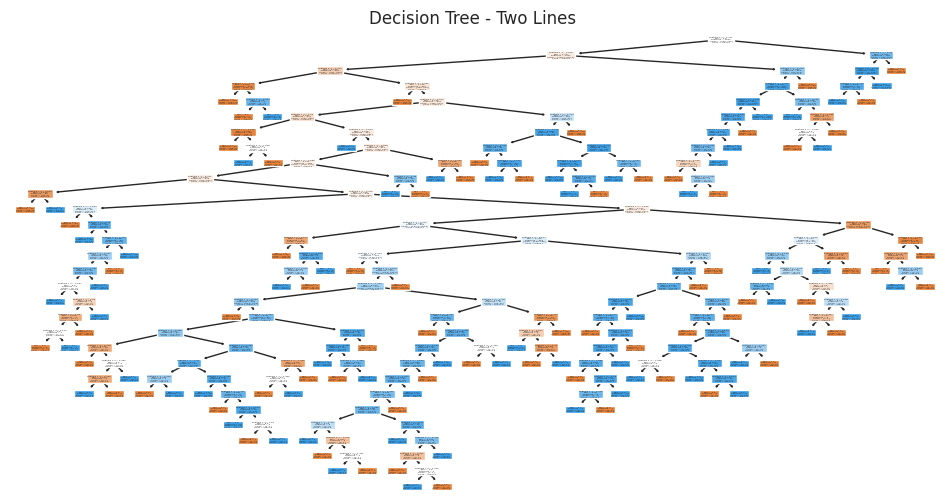

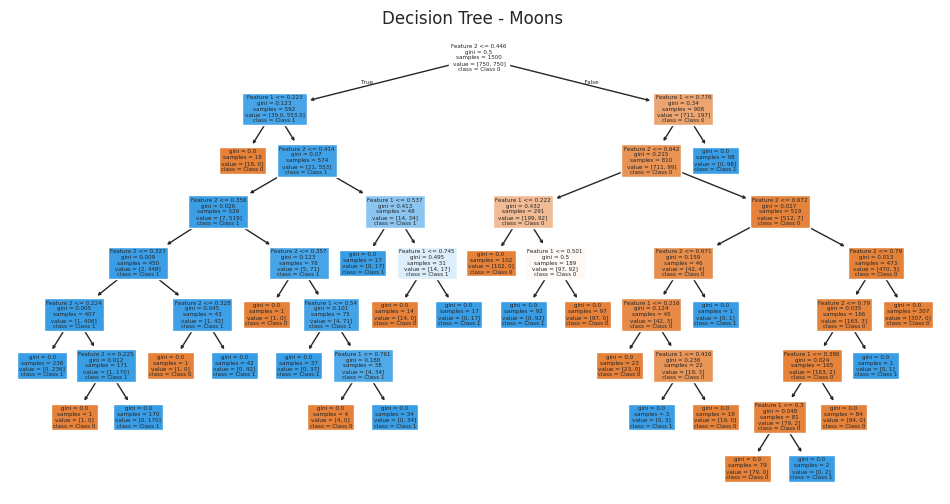

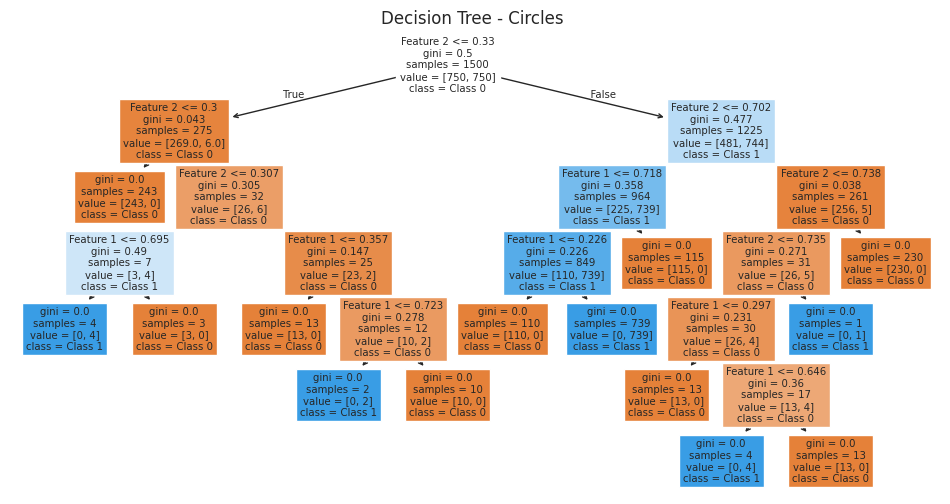

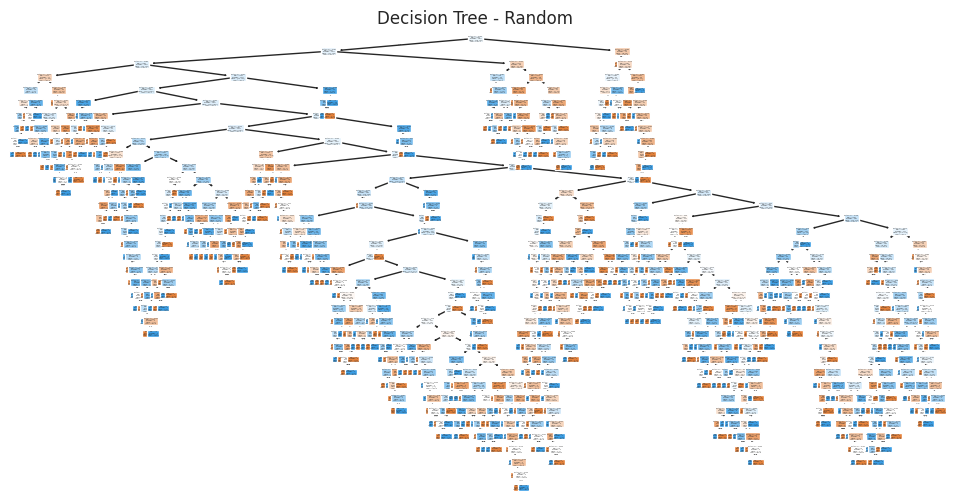

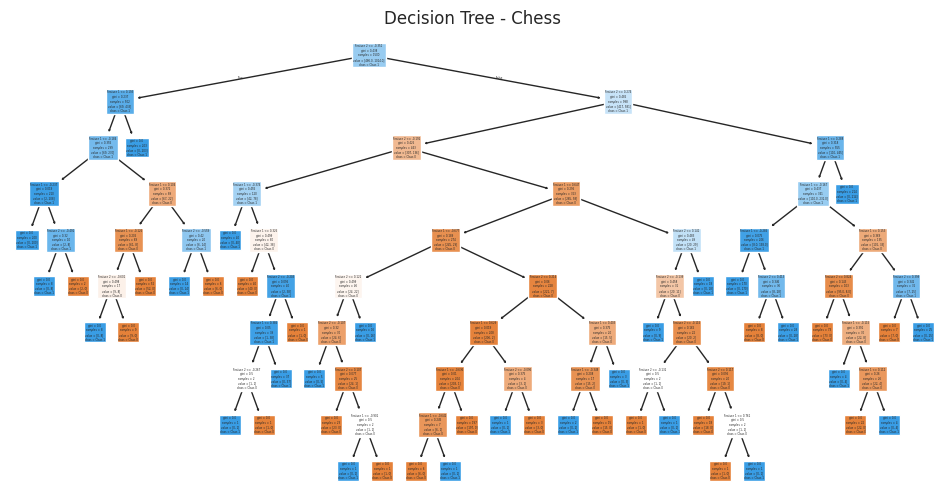

In [14]:
print("Decision Trees without pruning:")
plot_decision_trees_for_all_datasets(datasets)

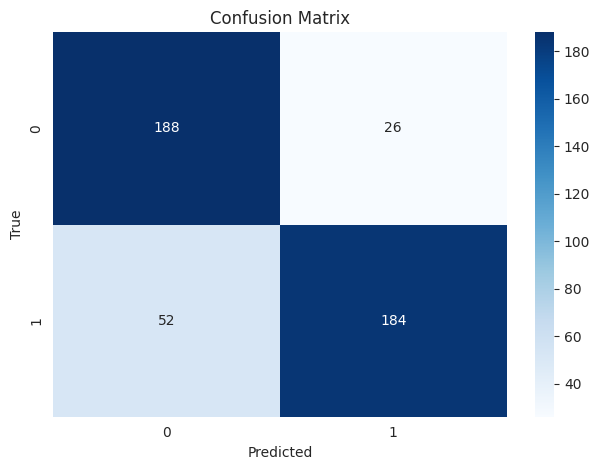

Classification Report Three:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       214
           1       0.88      0.78      0.83       236

    accuracy                           0.83       450
   macro avg       0.83      0.83      0.83       450
weighted avg       0.83      0.83      0.83       450



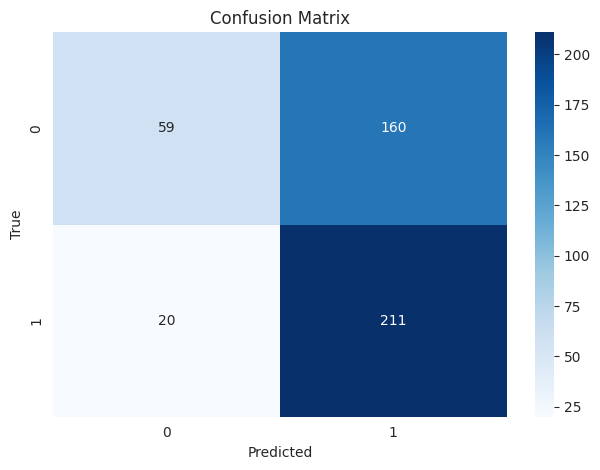

Classification Report Five:
              precision    recall  f1-score   support

           0       0.75      0.27      0.40       219
           1       0.57      0.91      0.70       231

    accuracy                           0.60       450
   macro avg       0.66      0.59      0.55       450
weighted avg       0.66      0.60      0.55       450



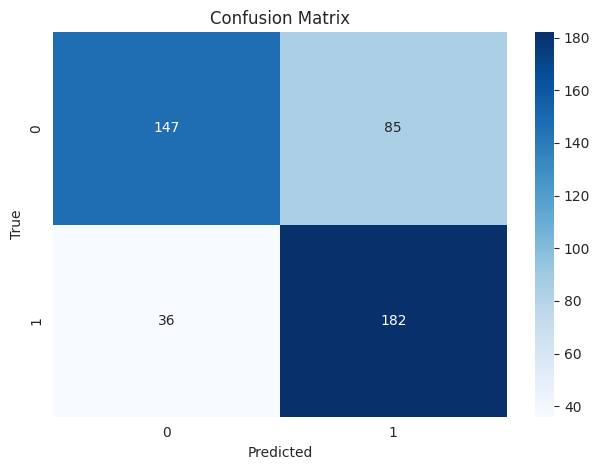

Classification Report Seven:
              precision    recall  f1-score   support

           0       0.80      0.63      0.71       232
           1       0.68      0.83      0.75       218

    accuracy                           0.73       450
   macro avg       0.74      0.73      0.73       450
weighted avg       0.74      0.73      0.73       450



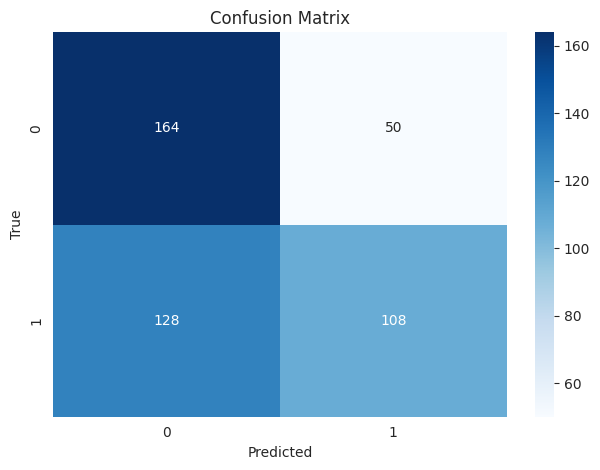

Classification Report Nine:
              precision    recall  f1-score   support

           0       0.56      0.77      0.65       214
           1       0.68      0.46      0.55       236

    accuracy                           0.60       450
   macro avg       0.62      0.61      0.60       450
weighted avg       0.63      0.60      0.60       450



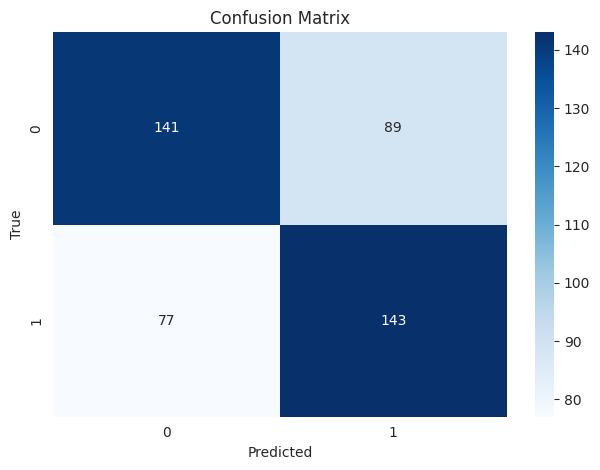

Classification Report Eleven:
              precision    recall  f1-score   support

           0       0.65      0.61      0.63       230
           1       0.62      0.65      0.63       220

    accuracy                           0.63       450
   macro avg       0.63      0.63      0.63       450
weighted avg       0.63      0.63      0.63       450



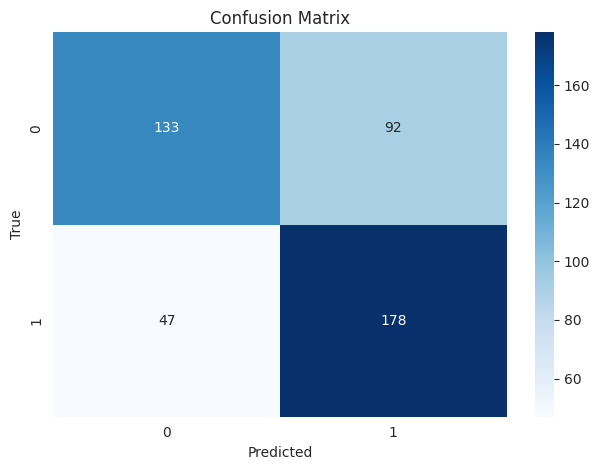

Classification Report Thirteen:
              precision    recall  f1-score   support

           0       0.74      0.59      0.66       225
           1       0.66      0.79      0.72       225

    accuracy                           0.69       450
   macro avg       0.70      0.69      0.69       450
weighted avg       0.70      0.69      0.69       450



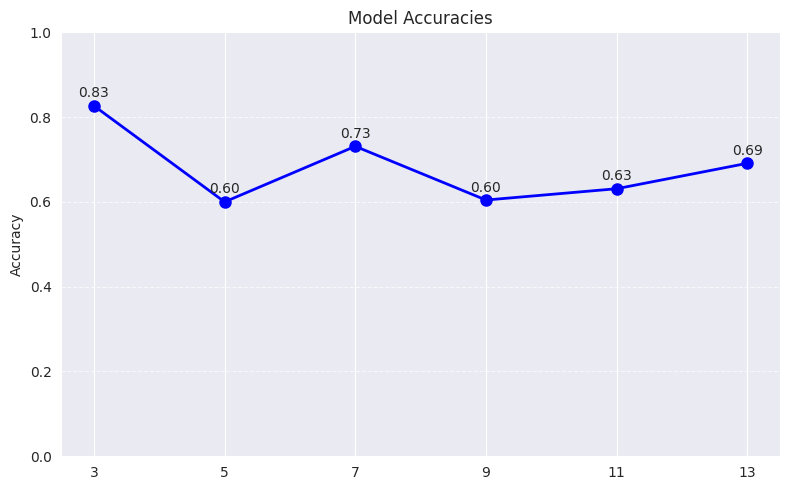

In [99]:
evaluate_model(DecisionTreeClassifier(max_depth=2), "Decision Tree - Max Depth = 2", datasets)


Decision Trees with max_depth=2:


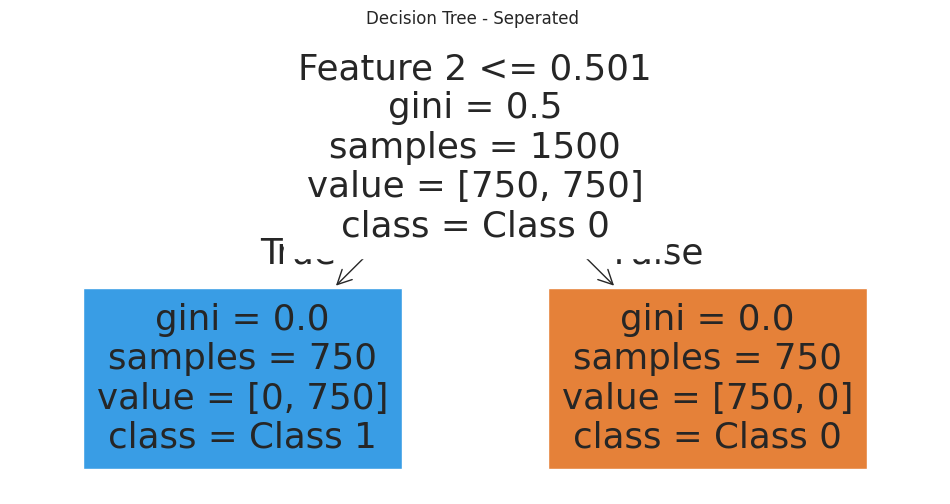

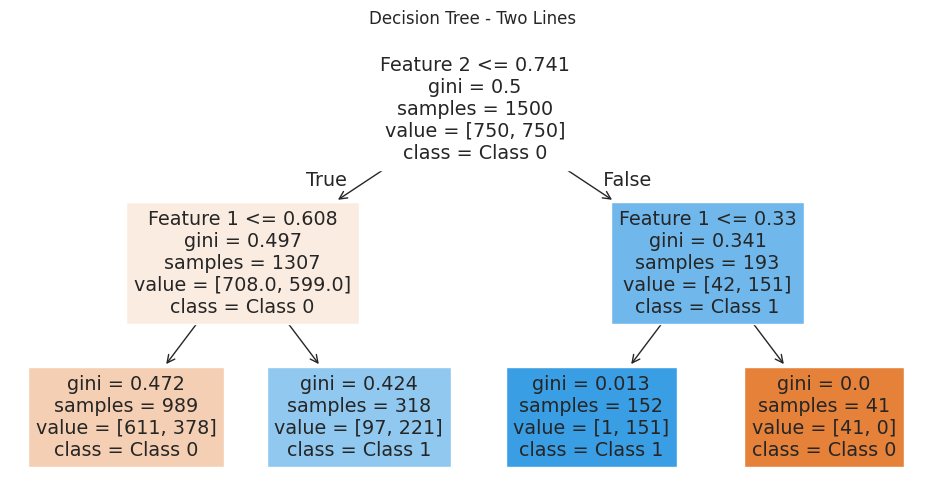

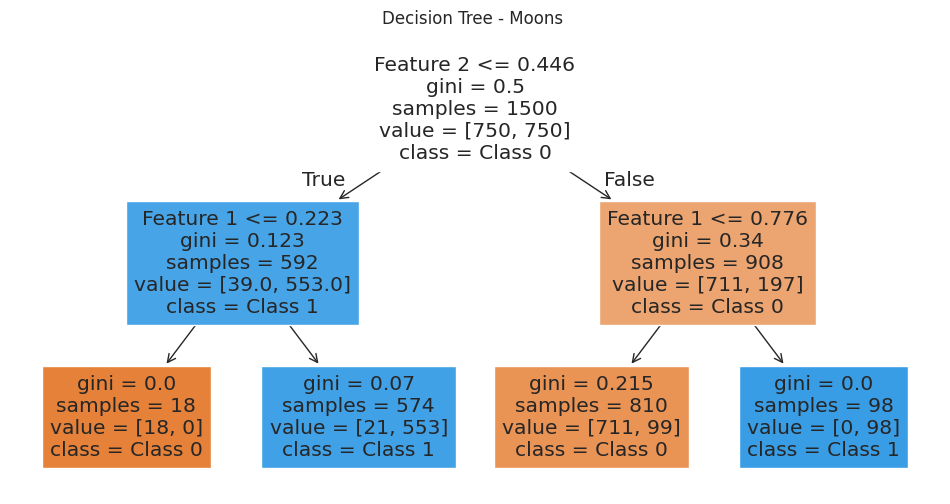

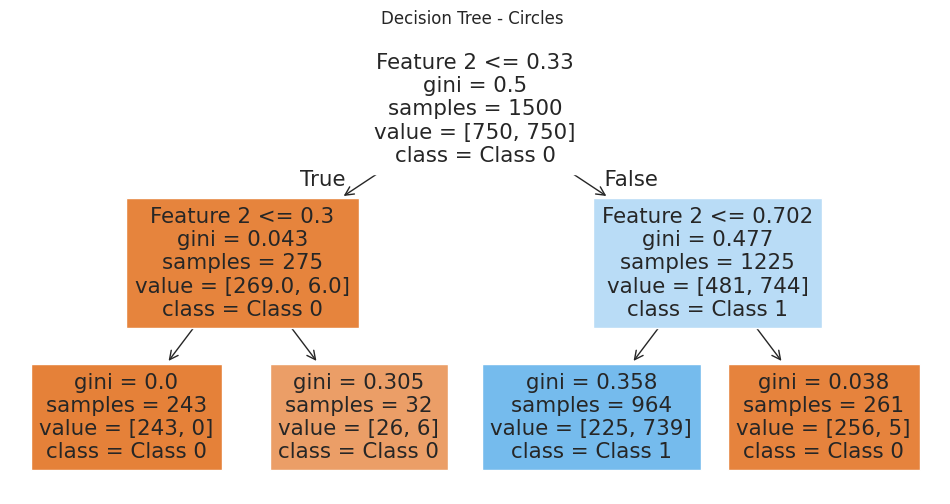

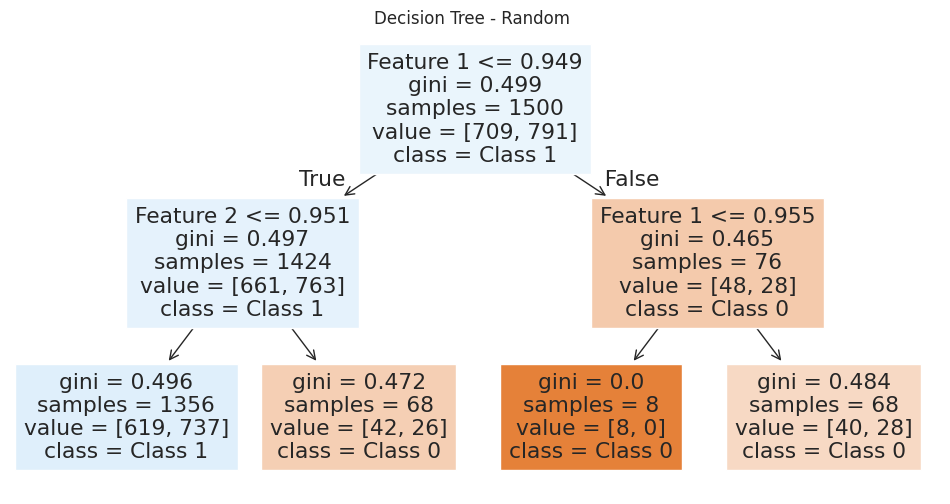

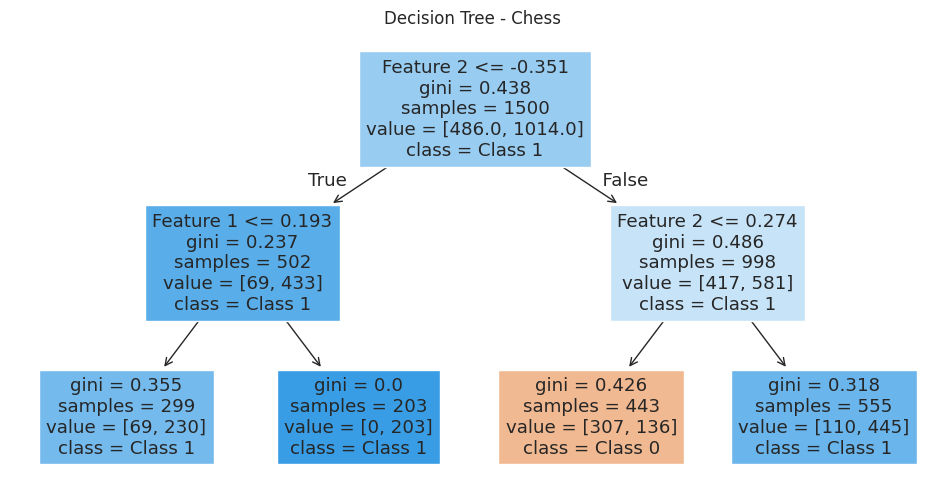

In [16]:
print("\nDecision Trees with max_depth=2:")
plot_decision_trees_for_all_datasets(datasets, max_depth=2)

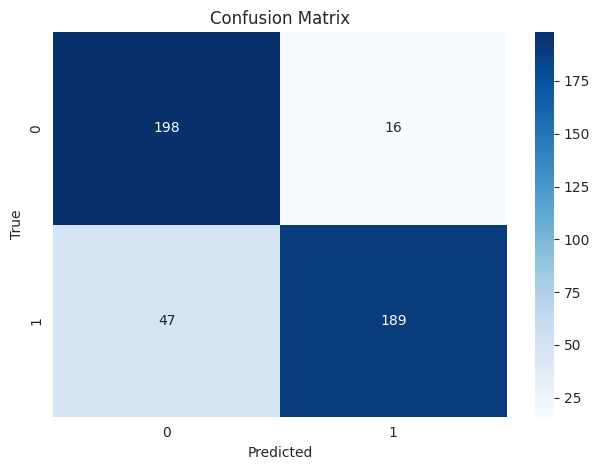

Classification Report Three:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       214
           1       0.92      0.80      0.86       236

    accuracy                           0.86       450
   macro avg       0.87      0.86      0.86       450
weighted avg       0.87      0.86      0.86       450



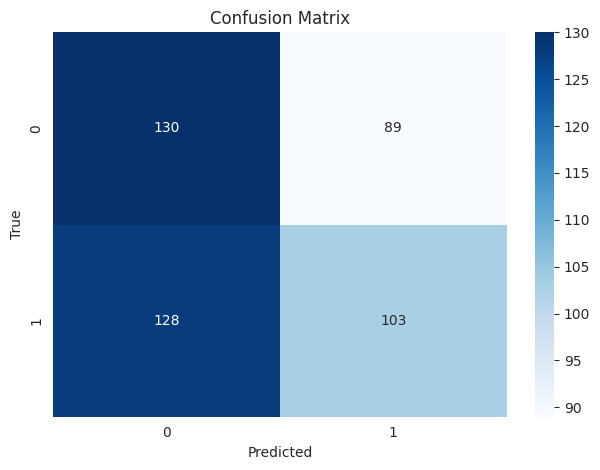

Classification Report Five:
              precision    recall  f1-score   support

           0       0.50      0.59      0.55       219
           1       0.54      0.45      0.49       231

    accuracy                           0.52       450
   macro avg       0.52      0.52      0.52       450
weighted avg       0.52      0.52      0.52       450



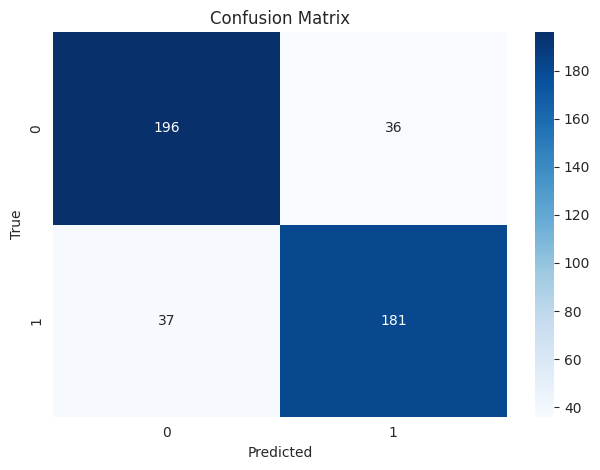

Classification Report Seven:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       232
           1       0.83      0.83      0.83       218

    accuracy                           0.84       450
   macro avg       0.84      0.84      0.84       450
weighted avg       0.84      0.84      0.84       450



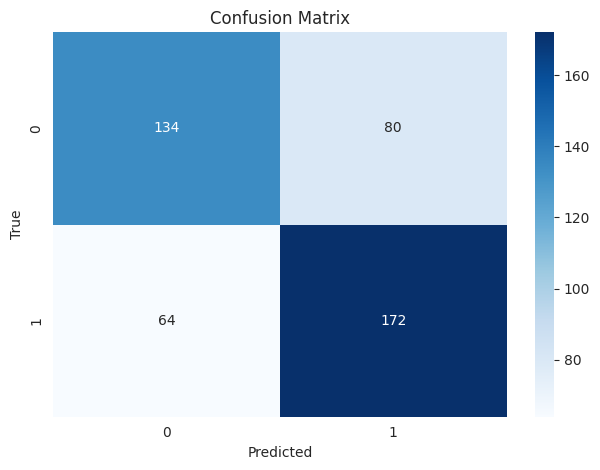

Classification Report Nine:
              precision    recall  f1-score   support

           0       0.68      0.63      0.65       214
           1       0.68      0.73      0.70       236

    accuracy                           0.68       450
   macro avg       0.68      0.68      0.68       450
weighted avg       0.68      0.68      0.68       450



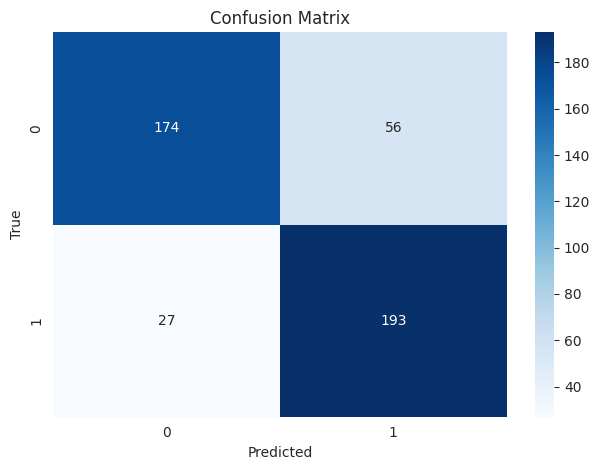

Classification Report Eleven:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       230
           1       0.78      0.88      0.82       220

    accuracy                           0.82       450
   macro avg       0.82      0.82      0.82       450
weighted avg       0.82      0.82      0.82       450



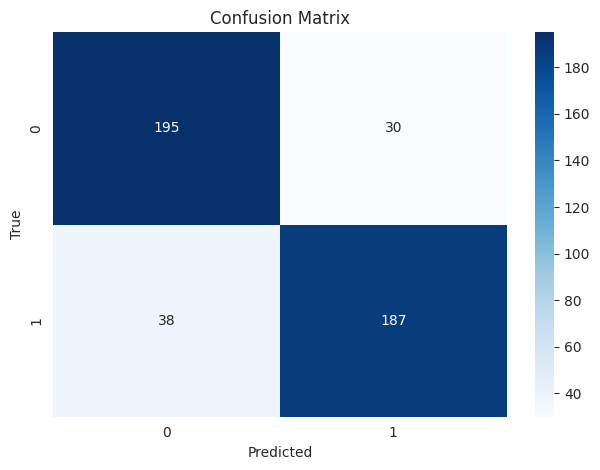

Classification Report Thirteen:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       225
           1       0.86      0.83      0.85       225

    accuracy                           0.85       450
   macro avg       0.85      0.85      0.85       450
weighted avg       0.85      0.85      0.85       450



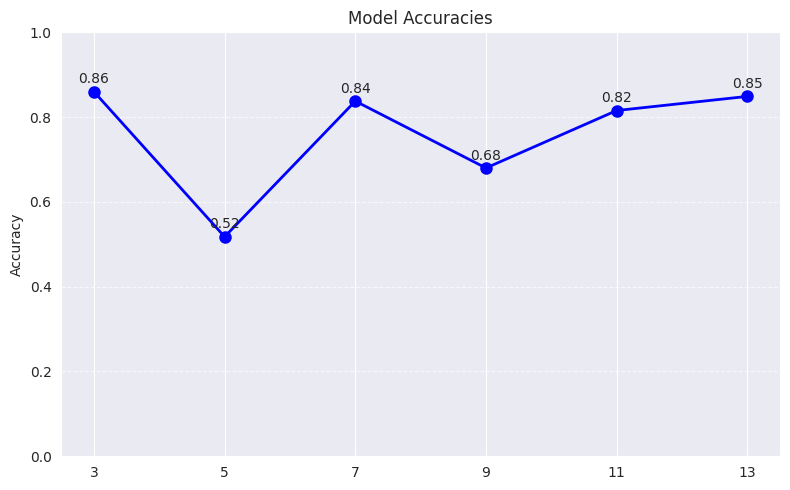

In [100]:
evaluate_model(SVC(kernel="linear", probability=True), "SVM Linear", datasets)

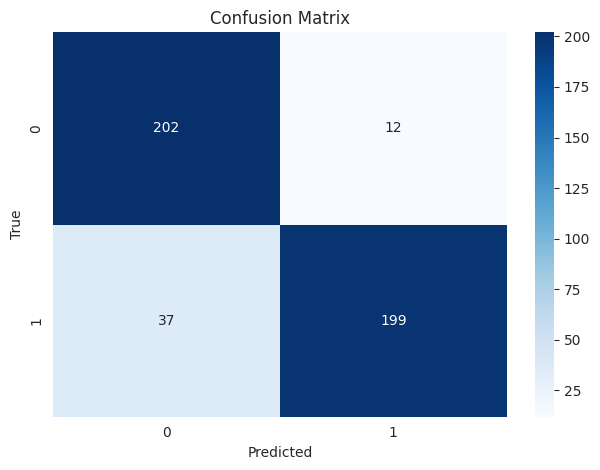

Classification Report Three:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       214
           1       0.94      0.84      0.89       236

    accuracy                           0.89       450
   macro avg       0.89      0.89      0.89       450
weighted avg       0.90      0.89      0.89       450



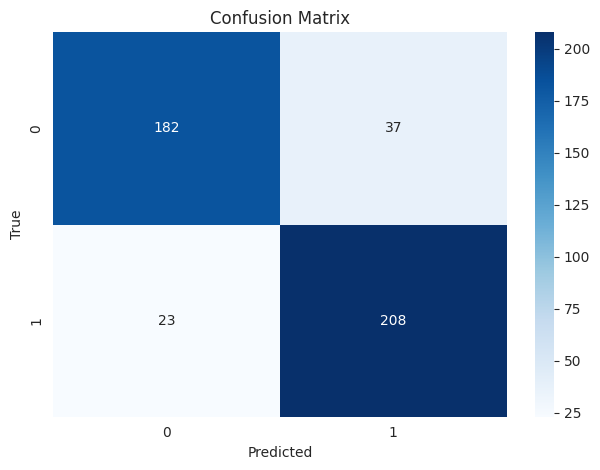

Classification Report Five:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       219
           1       0.85      0.90      0.87       231

    accuracy                           0.87       450
   macro avg       0.87      0.87      0.87       450
weighted avg       0.87      0.87      0.87       450



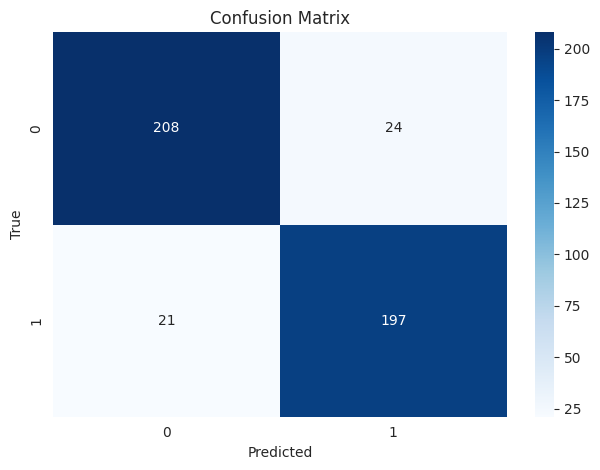

Classification Report Seven:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       232
           1       0.89      0.90      0.90       218

    accuracy                           0.90       450
   macro avg       0.90      0.90      0.90       450
weighted avg       0.90      0.90      0.90       450



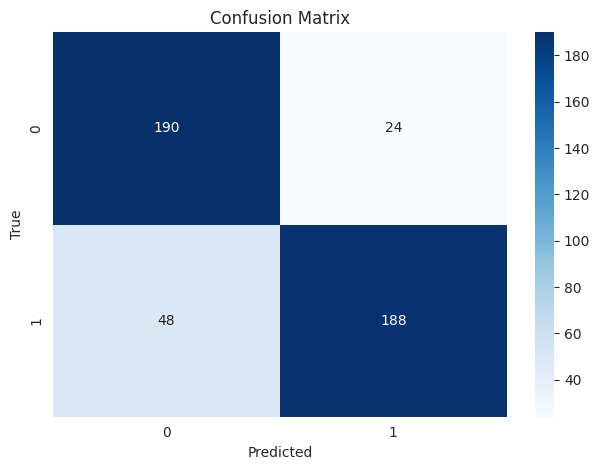

Classification Report Nine:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       214
           1       0.89      0.80      0.84       236

    accuracy                           0.84       450
   macro avg       0.84      0.84      0.84       450
weighted avg       0.84      0.84      0.84       450



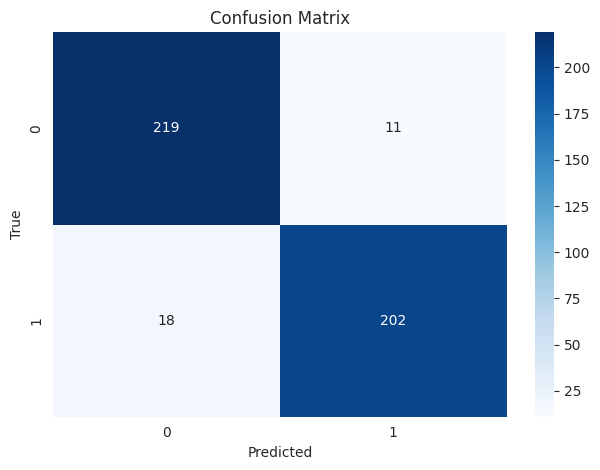

Classification Report Eleven:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       230
           1       0.95      0.92      0.93       220

    accuracy                           0.94       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.94      0.94      0.94       450



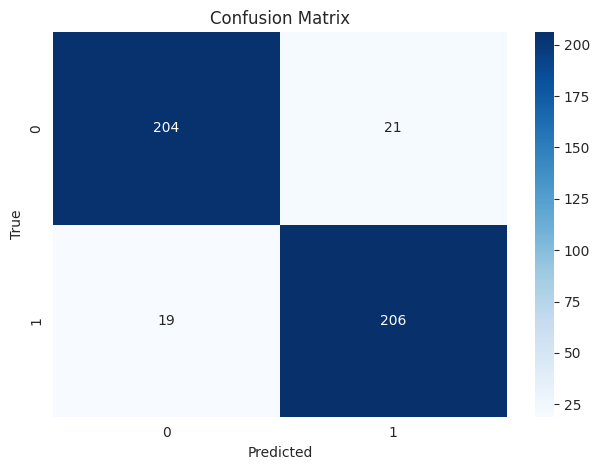

Classification Report Thirteen:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       225
           1       0.91      0.92      0.91       225

    accuracy                           0.91       450
   macro avg       0.91      0.91      0.91       450
weighted avg       0.91      0.91      0.91       450



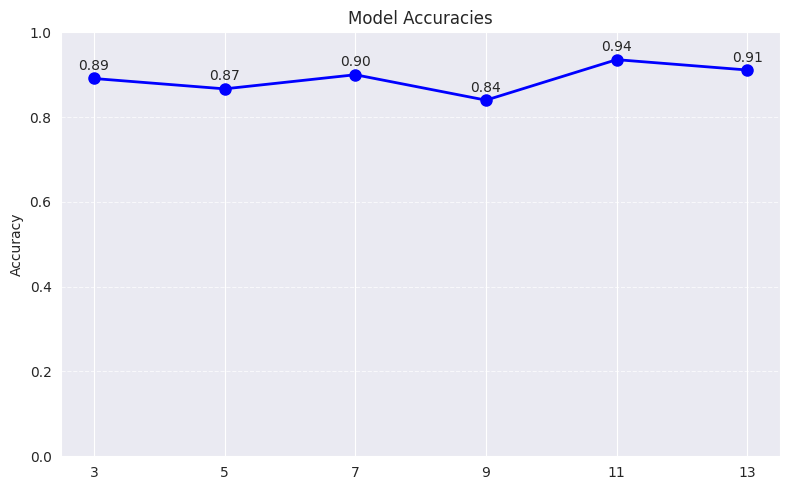

In [101]:
evaluate_model(SVC(kernel="rbf", probability=True), "SVM RBF", datasets)
